In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pycaret.regression import *
import numpy as np
#import warnings
#np.warnings = warnings

C:\Users\50259\AppData\Local\Temp\ipykernel_17512\2091452776.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
profile = ProfileReport(df, title='Pandas Profiling Report PRUEBA', explorative=True)

#========================================================Se guarda perfil en archivo html=======================================
profile.to_file("profile_report_PRUEBA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA

En base al perfil realizado sobre el conjunto de datos, se determinan las variables que poseen mayor relacion con la variable dependiente (sales price) y la relacion que tienen con otras variables:

| **Alley(0.601)** | **ExterQual(-0.633)** | **FullBath(0.636)** | **GarageArea(0.649)** | **GarageCars(0.691)** | **GarageFinish(-0.592)** | **GarageYrBlt(0.594)** | **GrLivArea(0.731)** | **OverallQual(0.81)** | **TotalBsmtSF(0.603)** | **YearBuilt(0.653)** |
|------------------|-----------------------|---------------------|-----------------------|-----------------------|--------------------------|------------------------|----------------------|-----------------------|------------------------|----------------------|
| 3SsnPorch        | GarageYrBlt           | GrLivArea           | GarageCars            | GarageArea            | YearBuilt                | BsmtQual               | 2ndFlrSF             | BsmtQual              | 1stFlrSF               | BsmtQual             |
| Condition2       | OverallQual           |                     | GarageYrBlt           | GarageYrBlt           |                          | ExterQual              | FullBath             | ExterQual             |                        | ExterQual            |
| MSZoning         | YearBuilt             |                     |                       | OverallQual           |                          | Foundation             | OverallQual          | GarageCars            |                        | Foundation           |
| MiscFeature      |                       |                     |                       | YearBuilt             |                          | GarageArea             | TotRmsAbvGrd         | GarageYrBlt           |                        | GarageCars           |
| Neighborhood     |                       |                     |                       |                       |                          | GarageCars             |                      | GrLivArea             |                        | GarageFinish         |
| RoofMatl         |                       |                     |                       |                       |                          | OverallQual            |                      | YearBuilt             |                        | GarageYrBlt          |
| Street           |                       |                     |                       |                       |                          | YearBuilt              |                      |                       |                        | OverallQual          |
| Utilities        |                       |                     |                       |                       |                          | YearRemodAdd           |                      |                       |                        | YearRemodAdd         |

Posteriormente se evalúa las variables que tienen mayor relación con Sales Price y se elimina aquellas que se encuentren fuertemente relacionadas entre sí, seleccionando la variable de mayor correlación. Por ejemplo: entre Garage Area y Garage Cars que están fuertemente relacionadas entre sí, se selecciona únicamente Garage Cars debido a que se prioriza por tener una mayor correlación con la variable Sales Price. Por lo que siguiendo la lógica anteriormente planteada se obtiene el primer filtro de variables con potencial de formar parte del modelo:

- OverallQual
- GrLivArea
- GarageCars
- YearBuilt
- TotalBsmtSF

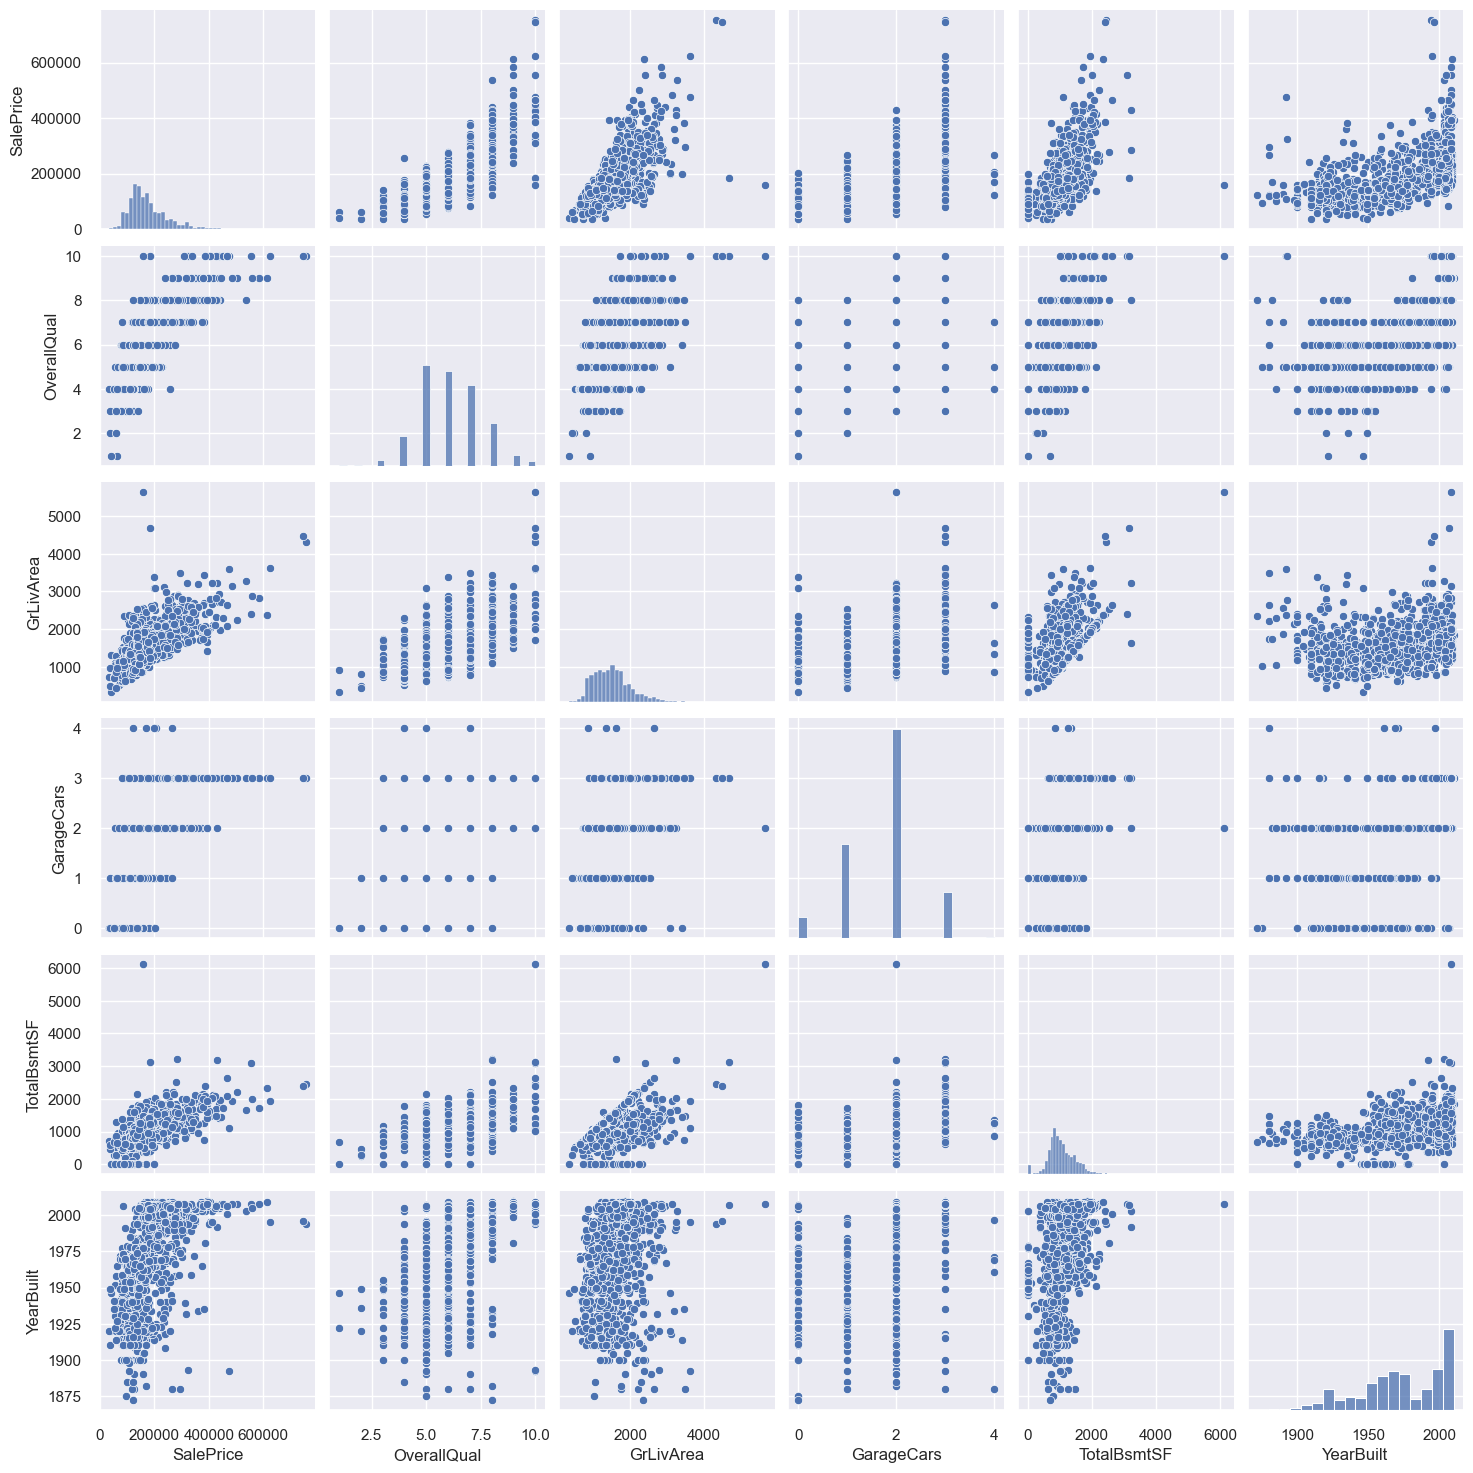

In [5]:
#Gráficas cruzadas para observar comportamiento general entre variables independientes y dependientes 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
plot=sns.pairplot(df[cols], size = 2.5)
plot.savefig('pair_plot.png')

Se observa una fuerte linealidad entre las variables dependiente e independiente, así como la existencia de outliers que se resalta en las gráficas en donde las variables se entrecruzan consigo mismas, por lo que se propone la convertir los outliers en valores extremos que se encuentran dentro del rango de datos. En el caso de los valores nulos se calcula el porcentaje de nulos que poseen las variables seleccionadas

In [6]:
total = df[cols].isnull().sum().sort_values(ascending=False)
total

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
YearBuilt      0
dtype: int64

En el caso de OverallQual se tiene una distribución muy similar a la distribución normal con la diferencia que se tiene una ligera asimetría hacia la derecha, mientras que GrLivArea posee una mayor asimetría y la distribución en general está distante a la distribución gaussiana. En GarageCars se observa una mayor frecuencia en la clasificación de 2 vehículos en el garage. TotalBsmSF al igual que GrLivArea se observa una mayor asimetría y la presencia de una mayor cantidad de outliers. En YearBuilt se tiene la mayor variación en comparación a las demás variables analizadas, de igual forma su distribución es la que se encuentra más alejada de la distribución normal esperada.

### Descripción de Warnings en EDA

Las alertas en el perfil generado y con la exploración de datos nos indica información importante a considerar previo a seleccionar una variable como parte del modelo. En ese sentido, el conjunto de datos posee 6 alertas principales:

- **Alta correlación**: 
    * Indica que entre las variables existe una fuerte relación ya sea proporcional o inversamente proporcional. Es importante considerarla ya que al momento de seleccionar variables, debe existir una relación con la variable independiente pero no entre variables dependientes (no debe existir multicolinealidad).

- **Desequilibrio**: 

    * Resalta que alguna de las categorias dentro de una variable categorica posee una mayor frecuencia que las demás, esto es  otro factor a considerar ya que la falta de variabilidad podría tener efectos de sesgar el aprendizaje del modelo a tener ciertas respuestas en situación de que se muestre la categoría similarmente si no aporta otros valores podría tratarse como constante y por tanto no serviría en el modelo.

- **Datos Faltantes**: 

    * Es importante porque indica las variables que poseen valores nulos, de forma que se puedan abordar el tratamiento de valores nulos ya sea dejando unicamente los registros completos o si se debería realizar la imputación de los datos. Esto con la finalidad de facilitar el proceso de aprendizaje del modelo y tener mejores predicciones.
    
- **Uniforme**: 
    * La falta de variabilidad sobre la frecuencia en que aparecen los valores de una variable puede presentar un problema pues al ser tan específico el valor con el registro no existe un patrón o relación que el modelo pueda asociar a la predicción de la variable objetivo, por lo que puede afectar su aprendizaje y en algunos casos provocar sobreaprendizaje

- **Unico**: 
    * Al igual que la alerta anterior, presenta un problema debido a que el valor se asigna a cada registro por lo que puede ocasionar problemas de aprendizaje ya que se asocia el registro con el valor de la variable objetivo omitiendo otras variables que deben considerarse.

- **Valores cero**: 
    * Se deben considerar ya que en algunos casos pueden representar valores nulos o faltantes, de igual forma la presencia de muchos ceros puede afectar la parte de transformación y normalización al tener un efecto sobre la desviación estándar. Ocasionando en algunos casos, sesgo en la predicción de los datos

In [7]:
df_temp=df[cols]
def getColumnTypes(dataset):
# Descripcion: Esta funcion extrae el tipo de dominio de las columnas de un dataset
# Entradas: Pandas Dataframe
# Salida: Tupla con arreglo que contiene nombre de columnas
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return discretas, continuas, categoricas

In [8]:
discretas, continuas, categoricas=getColumnTypes(df_temp)
#Valido que no existan negativos o cero
for col in continuas:
    minimo=df_temp[col].min()
    if minimo<=0:
        df_temp[col]=df_temp[col]+abs(minimo)+1
    else:
        df_temp[col]=df_temp[col]

#Probando transformaciones
for c in df_temp[continuas].columns: 
    name=c+'_log'
    df_temp[name]=np.log(df_temp[c])
    name=c+'_inv'
    df_temp[name]=(1/df_temp[c])
    name=c+'_cuad'
    df_temp[name]=(df_temp[c]**2)
    name=c+'_coxbox'
    df_temp[name],_=stats.boxcox(df_temp[c])
    name=c+'_yeo'
    df_temp[name],_=stats.yeojohnson(df_temp[c])



In [9]:
continuas

['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']

In [10]:
#Eleccion de transformacion
for c in df_temp.columns:
    print(f'{c}\n resultado: {stats.shapiro(df_temp[c])}')

SalePrice
 resultado: ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)
OverallQual
 resultado: ShapiroResult(statistic=0.9480094909667969, pvalue=2.688552318270029e-22)
GrLivArea
 resultado: ShapiroResult(statistic=0.927983283996582, pvalue=6.59922021670945e-26)
GarageCars
 resultado: ShapiroResult(statistic=0.8353784084320068, pvalue=2.305242068923655e-36)
TotalBsmtSF
 resultado: ShapiroResult(statistic=0.9173528552055359, pvalue=1.611758192570196e-27)
YearBuilt
 resultado: ShapiroResult(statistic=0.9255961775779724, pvalue=2.7690108619978015e-26)
SalePrice_log
 resultado: ShapiroResult(statistic=0.9912080764770508, pvalue=1.1514231346154702e-07)
SalePrice_inv
 resultado: ShapiroResult(statistic=0.8707567453384399, pvalue=4.1280448578940606e-33)
SalePrice_cuad
 resultado: ShapiroResult(statistic=0.6027659177780151, pvalue=0.0)
SalePrice_coxbox
 resultado: ShapiroResult(statistic=0.9915352463722229, pvalue=1.9097859649264137e-07)
SalePrice_yeo
 resultado: Shapi

Al observar los resultados de Shapiro, se concluye que la transformacion de yeo-jhonson seria la transformacion ideal dado el estado en que se encuentra los datos

In [11]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
df_final=df[cols]
num_filas_train=int(len(df_final)*0.8)
data_train=df_final.sample(n=num_filas_train, random_state=2023)
data_test=df_final.drop(data_train.index)

In [12]:
print(f"filas entreno {data_train.shape[0]}")
print(f"filas test {data_test.shape[0]}")

filas entreno 1168
filas test 292


In [13]:

dataset=setup(data=data_train,
              target='SalePrice',
              session_id=2023,
              outliers_threshold=0.05,
              normalize=True,
              normalize_method='minmax',
              transformation=True)

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 6)"
4,Transformed data shape,"(1168, 6)"
5,Transformed train set shape,"(817, 6)"
6,Transformed test set shape,"(351, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [14]:
#comparando modelos
best=compare_models(sort='RMSE',errors="raise",n_select=3)

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [15]:
#metricas de los modelos
regression_results = pull()
print(regression_results)

                                    Model         MAE           MSE  \
rf                Random Forest Regressor  24640.3484  1.569623e+09   
gbr           Gradient Boosting Regressor  24685.3899  1.560809e+09   
lightgbm  Light Gradient Boosting Machine  25618.1674  1.542826e+09   
et                  Extra Trees Regressor  26098.4720  1.676406e+09   
knn                 K Neighbors Regressor  26682.9294  1.753906e+09   
xgboost         Extreme Gradient Boosting  26805.0834  1.761099e+09   
llar         Lasso Least Angle Regression  29056.9505  1.871957e+09   
lasso                    Lasso Regression  29062.2627  1.872256e+09   
lar                Least Angle Regression  29063.2961  1.872280e+09   
lr                      Linear Regression  29063.2961  1.872280e+09   
br                         Bayesian Ridge  29045.3148  1.872348e+09   
ridge                    Ridge Regression  28901.4414  1.883168e+09   
ada                    AdaBoost Regressor  30739.3196  1.940809e+09   
huber 

In [16]:
top3=best[:3]
top3

[RandomForestRegressor(n_jobs=-1, random_state=2023),
 GradientBoostingRegressor(random_state=2023),
 LGBMRegressor(random_state=2023)]

Los tres modelos que poseen mejor comportamiento al ordenarlos según RMSE son:

| **Modelo**              | **MAE**    | **MSE**      | **RMSE**   | **R2** | **RMSLE** | **MAPE** |
|-------------------------|------------|--------------|------------|--------|-----------|----------|
| Random Forest           | 24640.3484 | 1.569623e+09 | 38405.9498 | 0.7324 | 0.1959    | 0.1439   |
| Gradient Boosting       | 24685.3899 | 1.560809e+09 | 38430.2855 | 0.7318 | 0.1932    | 0.1430   |
| Light Gradient Boosting | 25618.1674 | 1.542826e+09 | 38510.5754 | 0.7350 | 0.2017    | 0.1509   |

Las métricas MAE, MSE y RMSE indican el error entre la predicción y el valor real esperado, por lo que en la medida que estos valores son menores se tendría un mejor comportamiento en el modelo pues indicaría una mayor precisión y exactitud. Actualmente random forest muestra el mejor comportamiento en lo que se refiere a dichas metricas. Por otro lado se tiene el R2 que indica la bondad del ajuste y que tanto las variables explican la variabilidad de la variable dependiente, en este caso Light Gradient Boosting posee un mejor ajuste a los datos en comparación a los demás modelos. En el caso de RMSLE que calcula los errores de predicción en distribuciones sesgadas, se observa que en el modelo Gradient Boosting se tiene un mejor comportamiento al tener la menor cantidad de error mientras que en MAPE donde se considera los errores relativos a la escala y su penalización Gradient Boosting posee el mejor comportamiento.

In [17]:
for model in best:
    print(f"--- {model} ---")
    evaluate_model(model)
    print(model)
    print("-----------------------")

--- RandomForestRegressor(n_jobs=-1, random_state=2023) ---


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

RandomForestRegressor(n_jobs=-1, random_state=2023)
-----------------------
--- GradientBoostingRegressor(random_state=2023) ---


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

GradientBoostingRegressor(random_state=2023)
-----------------------
--- LGBMRegressor(random_state=2023) ---


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LGBMRegressor(random_state=2023)
-----------------------


Al seleccionar la pestaña Feature Importance que se encuentra a la par de la pestaña de la curva de validación se puede observar la importancia de cada variable en el modelo.

- Random Forest: 
    * OverralQual es la variable con mayor peso en lo que se refiere a la predicción de la variable dependiente Sale price, el cual puede deberse a su fuerte correlación. En segunda medida se encuentra TotalBsmtSF seguida por YearBuilt, GarageCars y GrLivArea.

- Gradient Boost: 
    * OverralQual es la variable con mayor peso seguida por TotalBsmtSF, GarageCars, YearBuilt y GrLivArea. Es importante resaltar que a diferencia de Random Forest TotalBsmtSF, aunque sigue siendo relevante, su importancia es menor a la que posee en Random Forest. De igual forma GarageCars posee mayor peso en la predicción que YearBuilt en este modelo a comparación de Random Forest.

- Light Gradient Boost: 
    *  TotalBsmtSF es la variable con mayor peso seguida por YearBuilt, OverralQual, GarageCars y GrLivArea. Es importante resaltar que a diferencia de los modelos anteriores, se prioriza o se tiene mayor peso en la variable TotalBsmtSF dejando lo que es la variable OverralQual en tercer lugar de importancia.

In [18]:
import numpy as np
print(np.__version__)

# NOTA >>>>>>>>>> NUMPY 1.23.4 NO TIENE PROBLEMAS CON PYCARET <<<<<<<<<<<<<<<

1.23.4


In [19]:
top2=best[:2]
tuned_models = [tune_model(model) for model in top2]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29009.3495,3051108320.0980,55236.8384,0.3996,0.2558,0.1841
1,29424.7531,2030519083.6765,45061.2814,0.7380,0.1985,0.1576
2,31760.6135,2376927786.0473,48753.7464,0.7280,0.2048,0.1586
3,24920.8498,1743503877.6981,41755.2856,0.6805,0.1805,0.1278
4,27796.3386,1559000855.7715,39484.1849,0.6959,0.1970,0.1483
5,25305.4421,1374336145.7846,37072.0399,0.7030,0.2311,0.1776
6,21793.6689,900365234.5243,30006.0866,0.8416,0.1826,0.1404
7,18585.3902,619498747.6891,24889.7318,0.8914,0.1841,0.1358
8,22108.4671,853503056.3107,29214.7746,0.8493,0.1796,0.1396


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
top1=best[:1]
tuned_models = [tune_model(model) for model in top1]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Por los resultados obtenidos, se concluye utilizar Random Forest debido a que muestra un mejor comportamiento general al tener un menor error de predicción y un mejor ajuste a los datos

In [21]:
len(top1)
modelwin=top1[0]
modelwin
final_model=finalize_model(modelwin) 

In [22]:
modelFin=final_model
modelFin

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['OverallQual', 'GrLivArea',
                                             'GarageCars', 'TotalBsmtSF',
                                             'YearBuilt'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=2023))])

In [23]:
save_model(model=modelFin,model_name='model_v2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['OverallQual', 'GrLivArea',
                                              'GarageCars', 'TotalBsmtSF',
                                              'YearBuilt'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('actual_estimator',
                  RandomForestRegressor(n_jobs=-1, random_state=2023))]),
 'model_v2.pkl')

In [24]:
model=load_model('model_v2')

Transformation Pipeline and Model Successfully Loaded


In [25]:
model

Pipeline(memory=FastMemory(location=C:\Users\50259\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['OverallQual', 'GrLivArea',
                                             'GarageCars', 'TotalBsmtSF',
                                             'YearBuilt'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 RandomForestRegressor(n_jobs=-1, random_state=2023))])

In [26]:
predicciones=predict_model(model, data=data_test)
predicciones

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,SalePrice,prediction_label
1,6,1262,2,1262,1976,181500,161770.000000
21,7,1108,1,637,1930,139400,122976.500000
27,8,1704,3,1704,2007,306000,325387.080000
29,4,520,1,520,1927,68500,83680.490000
31,5,1228,1,1228,1966,149350,144798.180000
...,...,...,...,...,...,...,...
1447,8,2090,2,1220,1995,240000,250167.170000
1449,5,630,0,630,1970,92000,100748.666667
1451,8,1578,3,1573,2008,287090,246998.810000
1455,6,1647,2,953,1999,175000,182577.000000


In [27]:
# Get evaluation metrics
metrics_df = pull()
print(metrics_df)

                     Model        MAE           MSE        RMSE      R2  \
0  Random Forest Regressor  20522.353  8.514998e+08  29180.4703  0.8568   

    RMSLE    MAPE  
0  0.1636  0.1278  


Se obtiene un comportamiento óptimo en la predicción de los valores como se puede observar con los valores de RMSE y R2, podría existir oportunidades de mejora incluyendo experimentando con las otras variables que se descartaron para evitar la colinealidad con la variables seleccionadas haciendo las sustituciones correspondientes. De igual forma indagar sobre la presencia de ceros en la variable TotalBsmtSF para descartar la posibilidad de que sea la codificación de valores nulos en el modelo de negocio, pues de ser así se debería profundizar en el efecto que tiene sobre la transformación y escala de datos ya que afecta en cierta medida la distribución de los datos.